# Support Vector Machine
## Aprendizado de Máquinas
### Separação de espécies de Iris com SVM
<p>Autor: Ricardo Favan</p>
<p>Data: 04.03.2022</p>
<p>Versão: 1.0</p>

In [1]:
# Importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
# Carreagar o dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Reduzindo para duas dimensões
X = iris.data[:,:2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [4]:
# Ajustar o modelo
svc = svm.SVC(kernel='poly', degree=3, C=1, gamma='auto', random_state=None)
svc.fit(X,y)

SVC(C=1, gamma='auto', kernel='poly')

In [5]:
# Preparando o ambiente para grafico
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

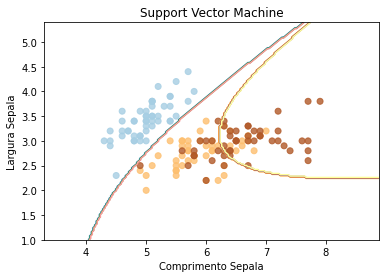

In [6]:
# Grafico dos "Hiperplanos Separadores"
plt.subplot(1,1,1)
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, alpha=0.8)
plt.xlabel("Comprimento Sepala")
plt.ylabel("Largura Sepala")
plt.xlim(xx.min(), xx.max())
plt.title("Support Vector Machine")
plt.show()

### Avaliando o Modelo

In [7]:
# importanto bibliotecas complementares
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [12]:
# Separando conjutno de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [13]:
# Ajustando o Modelo de SVM

# Configurando o Modelo
clf = svm.SVC(kernel='linear', random_state=None, probability=True)

# Ajustando o Modelo
clf.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
y_pred = clf.predict(X_test)

In [14]:
# Avaliar o modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average=None))
print("Recall:", metrics.recall_score(y_test, y_pred, average=None))


Accuracy: 0.9777777777777777
Precision: [1.         1.         0.91666667]
Recall: [1.         0.94444444 1.        ]


In [18]:
cancer = datasets.load_breast_cancer()

In [20]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [22]:
print(cancer.feature_names)

print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
